<a href="https://colab.research.google.com/github/ilyashm/plant-disease-detection/blob/main/Autoiencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.models import Model
from keras.preprocessing import image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
(X_train, _), (X_test, _) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)

X_train (60000, 28, 28)
X_test (10000, 28, 28)


In [ ]:
def pre_process(X):
    X = X/255.0
    X = X.reshape((len(X), 784))
    return X

X_train  =  pre_process(X_train)
X_test  =  pre_process(X_test)

print("X_train", X_train.shape)
print("X_test", X_test.shape)

X_train (60000, 784)
X_test (10000, 784)


In [ ]:
def show_data(X, n=10, height=28, width=28, title=""):
    plt.figure(figsize=(10, 3))
    for i in range(n):
        ax = plt.subplot(2,n,i+1)
        plt.imshow(X[i].reshape((height,width)))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title, fontsize = 20)

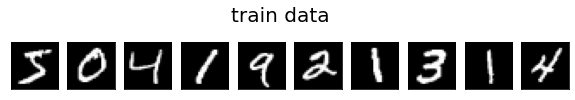

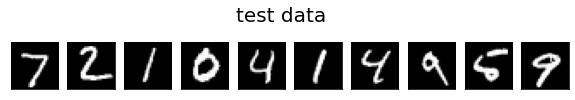

In [ ]:
show_data(X_train, title="train data")
show_data(X_test, title="test data")

In [ ]:
input_dim, output_dim = 784, 784
encode_dim = 100
hidden_dim = 256

In [ ]:
# encoder
input_layer = Input(shape=(input_dim,), name="INPUT")
hidden_layer_1 = Dense(hidden_dim, activation='relu', name="HIDDEN_1")(input_layer)

# code
code_layer = Dense(encode_dim, activation='relu', name="CODE")(hidden_layer_1)

# decoder
hidden_layer_2 = Dense(hidden_dim, activation='relu', name="HIDDEN_2")(code_layer)
output_layer = Dense(output_dim, activation='sigmoid', name="OUTPUT")(hidden_layer_2)

In [ ]:
AE = Model(input_layer, output_layer)
AE.compile(optimizer='adam', loss='binary_crossentropy')
AE.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
INPUT (InputLayer)           [(None, 784)]             0         
_________________________________________________________________
HIDDEN_1 (Dense)             (None, 256)               200960    
_________________________________________________________________
CODE (Dense)                 (None, 100)               25700     
_________________________________________________________________
HIDDEN_2 (Dense)             (None, 256)               25856     
_________________________________________________________________
OUTPUT (Dense)               (None, 784)               201488    
Total params: 454,004
Trainable params: 454,004
Non-trainable params: 0
_________________________________________________________________


In [ ]:
AE.fit(X_train, X_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.1123
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0802
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0758
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0736
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0722
Epoch 6/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0714
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0707
Epoch 8/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0703
Epoch 9/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0699
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0696


In [ ]:
decoded_data = AE.predict(X_test)

In [ ]:
get_encoded_data = Model(inputs=AE.input, outputs=AE.get_layer("CODE").output)

In [ ]:
encoded_data = get_encoded_data.predict(X_test)

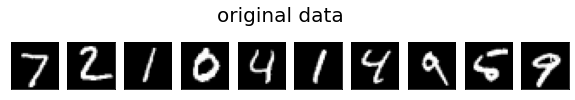

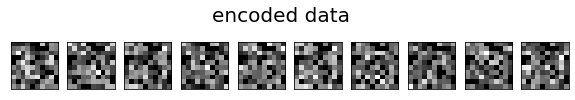

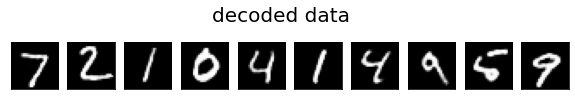

In [ ]:
show_data(X_test, title="original data")
show_data(encoded_data, height=10, width=10, title="encoded data")
show_data(decoded_data, title="decoded data")

In [ ]:
cat_train_path = "/content/training_set/training_set/cats/"
cat_test_path = "/content/test_set/test_set/cats/"
#/content/training_set/training_set/cats/
cat_train = []
for filename in os.listdir(cat_train_path):
    if filename.endswith(".jpg"):
        img = image.load_img(cat_train_path+filename, target_size=(128, 128))
        cat_train.append(image.img_to_array(img))
cat_train = np.array(cat_train)

cat_test = []
for filename in os.listdir(cat_test_path):
    if filename.endswith(".jpg"):
        img = image.load_img(cat_test_path+filename, target_size=(128, 128))
        cat_test.append(image.img_to_array(img))
cat_test = np.array(cat_test)

In [ ]:
#cat_train_path = "/content/training_set/training_set/cats/"
coco_train_path = "/content/drive/MyDrive/Colab Notebooks/coconut/train/coco_train/"
#cat_test_path = "/content/test_set/test_set/cats/"
coco_test_path = "/content/drive/MyDrive/Colab Notebooks/coconut/validation/coco_test/"
#/content/training_set/training_set/cats/
coco_train = []
for filename in os.listdir(coco_train_path):
    if filename.endswith(".jpg"):
        img = image.load_img(coco_train_path+filename, target_size=(128, 128))
        coco_train.append(image.img_to_array(img))
coco_train = np.array(coco_train)

coco_test = []
for filename in os.listdir(coco_test_path):
    if filename.endswith(".jpg"):
        img = image.load_img(coco_test_path+filename, target_size=(128, 128))
        coco_test.append(image.img_to_array(img))
coco_test = np.array(coco_test)

In [ ]:
print("coco_train", coco_train.shape)
print("coco_test", coco_test.shape)

coco_train (209, 128, 128, 3)
coco_test (66, 128, 128, 3)


In [ ]:
def show_coco_data(X, n=5, title=""):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        ax = plt.subplot(2,n,i+1)
        plt.imshow(image.array_to_img(X[i]))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title, fontsize = 20)

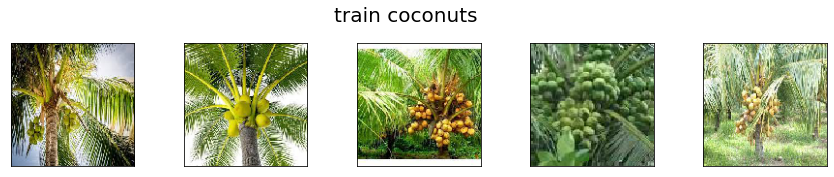

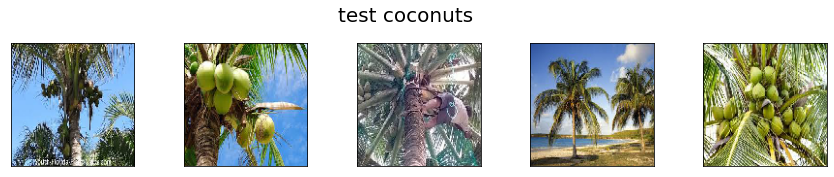

In [ ]:
show_coco_data(coco_train, title="train coconuts")
show_coco_data(coco_test, title="test coconuts")

In [ ]:
input_layer = Input(shape=(128, 128, 3), name="INPUT")
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

code_layer = MaxPooling2D((2, 2), name="CODE")(x)

x = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(code_layer)
x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
output_layer = Conv2D(3, (3, 3), padding='same', name="OUTPUT")(x)

In [ ]:
coco_AE = Model(input_layer, output_layer)
coco_AE.compile(optimizer='adam', loss='mse')
coco_AE.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
INPUT (InputLayer)           [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 8)         584       
_________________________________________________________________
CODE (MaxPooling2D)          (None, 16, 16, 8)         0   

In [ ]:
coco_AE.fit(coco_train, coco_train,
                epochs=30,
                batch_size=32,
                shuffle=True,
                validation_data=(coco_test, coco_test))

Epoch 1/30
7/7 [==============================] - 1s 95ms/step - loss: 1947.9829 - val_loss: 2025.6537
Epoch 2/30
7/7 [==============================] - 0s 54ms/step - loss: 1651.9421 - val_loss: 2017.1882
Epoch 3/30
7/7 [==============================] - 0s 51ms/step - loss: 1578.9908 - val_loss: 1971.2324
Epoch 4/30
7/7 [==============================] - 0s 49ms/step - loss: 1521.0820 - val_loss: 1950.0773
Epoch 5/30
7/7 [==============================] - 0s 50ms/step - loss: 1490.1990 - val_loss: 1922.3469
Epoch 6/30
7/7 [==============================] - 0s 49ms/step - loss: 1477.4513 - val_loss: 1923.7267
Epoch 7/30
7/7 [==============================] - 0s 49ms/step - loss: 1464.7062 - val_loss: 1910.9202
Epoch 8/30
7/7 [==============================] - 0s 50ms/step - loss: 1458.3286 - val_loss: 1906.9751
Epoch 9/30
7/7 [==============================] - 0s 50ms/step - loss: 1451.1111 - val_loss: 1898.1661
Epoch 10/30
7/7 [==============================] - 0s 48ms/step - loss: 1

In [ ]:
coco_AE.save("coco_AE.h5")

In [ ]:
get_encoded_coco = Model(inputs=coco_AE.input, outputs=coco_AE.get_layer("CODE").output)

In [ ]:
encoded_coco = get_encoded_coco.predict(coco_test)
encoded_coco = encoded_coco.reshape((len(coco_test), 16*16*8))
encoded_coco.shape

(66, 2048)

In [ ]:
reconstructed_cocos = coco_AE.predict(coco_test)

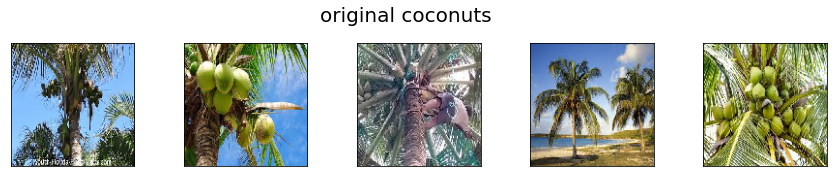

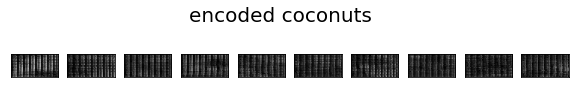

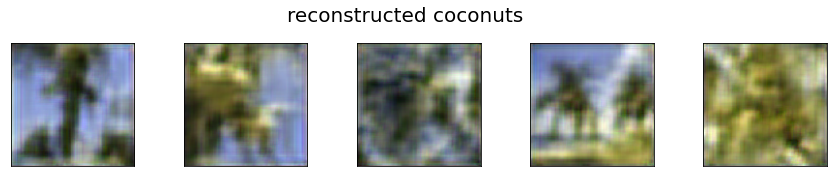

In [ ]:
show_coco_data(coco_test, title="original coconuts")
show_data(encoded_coco, height=32, width=64, title="encoded coconuts")
show_coco_data(reconstructed_cocos, title="reconstructed coconuts")

In [ ]:
! pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammedilyash","key":"54e9b09384b65b4c31b790ae68d7fd8d"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp /content/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! mkdir ~/.kaggle
#/content/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp /content/drive/MyDrive/kaggle.json /content/kaggle.json

cp: cannot stat '/content/drive/MyDrive/kaggle.json': No such file or directory


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              235KB  2021-10-21 20:52:33          14185  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           8520  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           3811  
fatiimaezzahra/famous-iconic-women                          Famous Iconic Women                               838MB  2021-02-28 14:56:00           1651  
dhruvildave/wikibooks-dataset                               Wikibooks Datase

In [ ]:
!kaggle datasets download -d tongpython/cat-and-dog

 95% 206M/218M [00:01<00:00, 172MB/s]
100% 218M/218M [00:01<00:00, 169MB/s]


In [ ]:
!unzip cat-and-dog.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl